In [1]:
from detect.fall_detection.detect import run
from models.common import DetectMultiBackend
import torch

/Users/maochenhui/miniforge3/envs/DL/lib/python3.8/site-packages/torchvision/io/image.py:11: UserWarning: Failed to load image Python extension: 
  warn(f"Failed to load image Python extension: {e}")


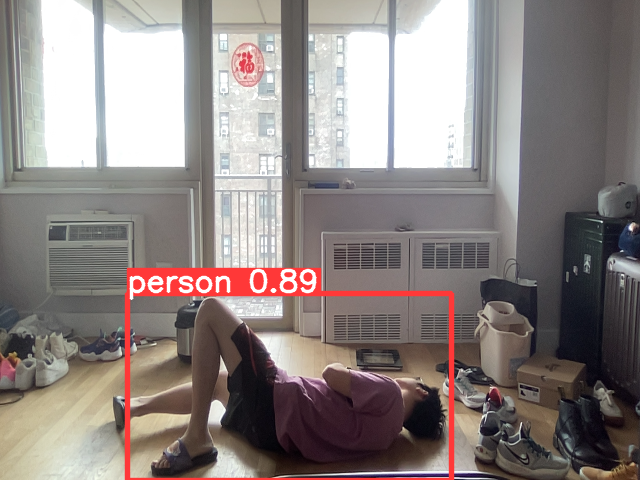

In [2]:
weights = "./runs/train/yolov5n/weights/best.pt"
source = "./data/dataset/Fall_Detection_Object/Test/Fall_Person_valid_000001.png"
data = "./data/custom.yaml"
imgsz = (416, 416)
view_img = True

device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
model = DetectMultiBackend(weights, device=device, data=data)
img0, boxes = run(model, device, source=source, imgsz=imgsz, view_img=view_img)

In [3]:
from PIL import Image
from IPython.core.display import display
demo = boxes[0]
demo = Image.fromarray(demo)

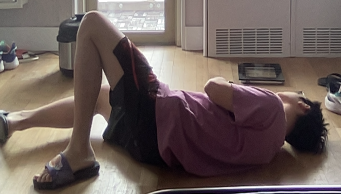

In [4]:
display(demo)